# Q-Learning

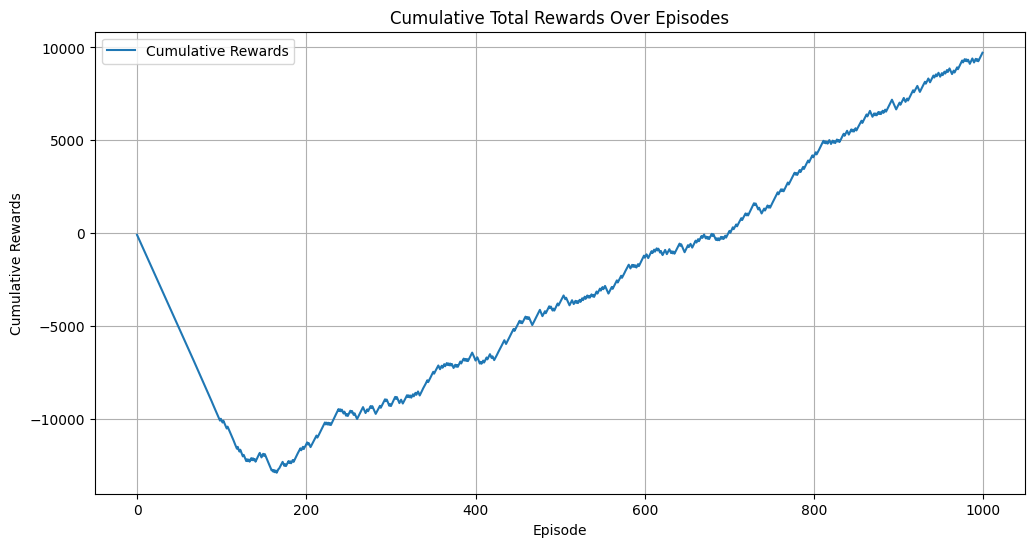

CSV file 'q_learning_rewards.csv' has been created with the reward data.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for CSV handling

# Environment setup
environment_rows = 11
environment_columns = 11
q_values = np.zeros((environment_rows, environment_columns, 4))
actions = ['up', 'right', 'down', 'left']

# Rewards setup
rewards = np.full((environment_rows, environment_columns), -100.)
rewards[0, 5] = 100.  # Goal location with high reward
aisles = {1: [i for i in range(1, 10)], 2: [1, 7, 9], 3: [i for i in range(1, 8)] + [9],
          4: [3, 7], 5: [i for i in range(11)], 6: [5], 7: [i for i in range(1, 10)],
          8: [3, 7], 9: [i for i in range(11)]}
for row_index in range(1, 10):
    for column_index in aisles[row_index]:
        rewards[row_index, column_index] = -1.

# Function definitions
def is_terminal_state(current_row_index, current_column_index):
    return rewards[current_row_index, current_column_index] != -1.

def get_starting_location():
    current_row_index, current_column_index = np.random.randint(environment_rows), np.random.randint(environment_columns)
    while is_terminal_state(current_row_index, current_column_index):
        current_row_index, current_column_index = np.random.randint(environment_rows), np.random.randint(environment_columns)
    return current_row_index, current_column_index

def get_next_action(current_row_index, current_column_index, epsilon):
    if np.random.random() < 1 - epsilon:
        return np.argmax(q_values[current_row_index, current_column_index])
    else:
        return np.random.randint(4)

def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index, new_column_index = current_row_index, current_column_index
    if actions[action_index] == 'up' and current_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
        new_column_index += 1
    elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index

# Q-learning parameters
epsilon = 0.1
discount_factor = 0.9
learning_rate = 0.9

# Re-initialize Q-values and reset the cumulative rewards
q_values = np.zeros((environment_rows, environment_columns, 4))
cumulative_rewards = []
episode_rewards = []  # List to store the reward of each episode for plotting

for episode in range(1000):
    row_index, column_index = get_starting_location()
    episode_reward = 0  # Reset the reward for the episode

    # Run the episode
    while not is_terminal_state(row_index, column_index):
        action_index = get_next_action(row_index, column_index, epsilon)
        old_row_index, old_column_index = row_index, column_index
        row_index, column_index = get_next_location(row_index, column_index, action_index)

        reward = rewards[row_index, column_index]
        episode_reward += reward  # Accumulate rewards for the episode

        # Update Q-values using the Q-learning update rule
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value
        q_values[old_row_index, old_column_index, action_index] = old_q_value + (learning_rate * temporal_difference)

        # If the agent hits a terminal state, break the loop
        if reward == -100:
            break

    # Store the episode reward
    episode_rewards.append(episode_reward)
    # Accumulate the rewards over episodes
    cumulative_rewards.append(sum(episode_rewards))

# Create a DataFrame with the episode numbers and cumulative rewards
reward_data = pd.DataFrame({
    'Episode': range(1, len(cumulative_rewards) + 1),
    'Cumulative_Reward': cumulative_rewards
})

# Save the DataFrame to a CSV file
reward_data.to_csv('q_learning_rewards.csv', index=False)

# Plot the cumulative rewards over episodes
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards, label='Cumulative Rewards')
plt.xlabel('Episode')
plt.ylabel('Cumulative Rewards')
plt.title('Cumulative Total Rewards Over Episodes')
plt.legend()
plt.grid(True)
plt.show()

print("CSV file 'q_learning_rewards.csv' has been created with the reward data.")

Episode 100: Cumulative Reward = -9755.0
Final Cumulative Rewards: [np.float64(-100.0), np.float64(-200.0), np.float64(-300.0), np.float64(-400.0), np.float64(-502.0), np.float64(-602.0), np.float64(-702.0), np.float64(-803.0), np.float64(-903.0), np.float64(-1004.0), np.float64(-1104.0), np.float64(-1206.0), np.float64(-1306.0), np.float64(-1407.0), np.float64(-1508.0), np.float64(-1608.0), np.float64(-1709.0), np.float64(-1812.0), np.float64(-1913.0), np.float64(-2013.0), np.float64(-2114.0), np.float64(-2216.0), np.float64(-2316.0), np.float64(-2416.0), np.float64(-2518.0), np.float64(-2618.0), np.float64(-2721.0), np.float64(-2821.0), np.float64(-2921.0), np.float64(-3022.0), np.float64(-3122.0), np.float64(-3222.0), np.float64(-3326.0), np.float64(-3426.0), np.float64(-3526.0), np.float64(-3627.0), np.float64(-3728.0), np.float64(-3828.0), np.float64(-3928.0), np.float64(-4028.0), np.float64(-4128.0), np.float64(-4229.0), np.float64(-4329.0), np.float64(-4429.0), np.float64(-4529.

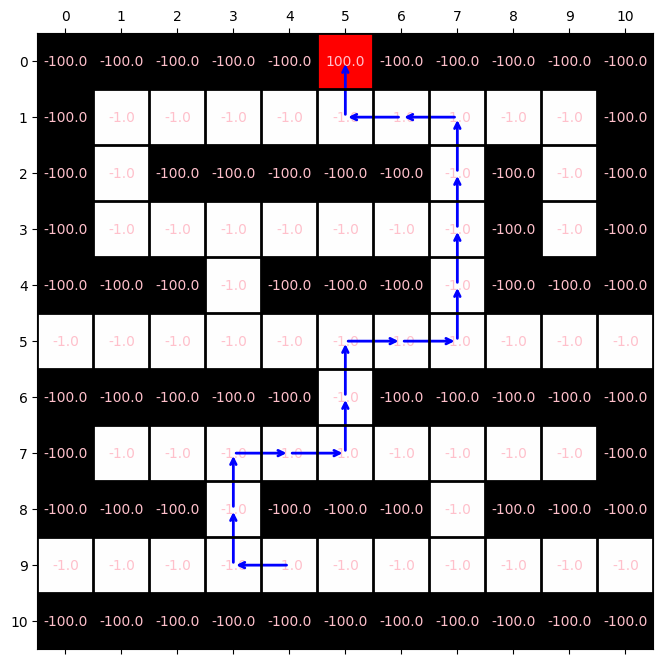

Reverse Optimal Path: [[0, 5], [1, 5], [1, 4], [1, 3], [1, 2], [1, 1], [2, 1], [3, 1], [3, 2], [3, 3], [4, 3], [5, 3], [5, 2]]


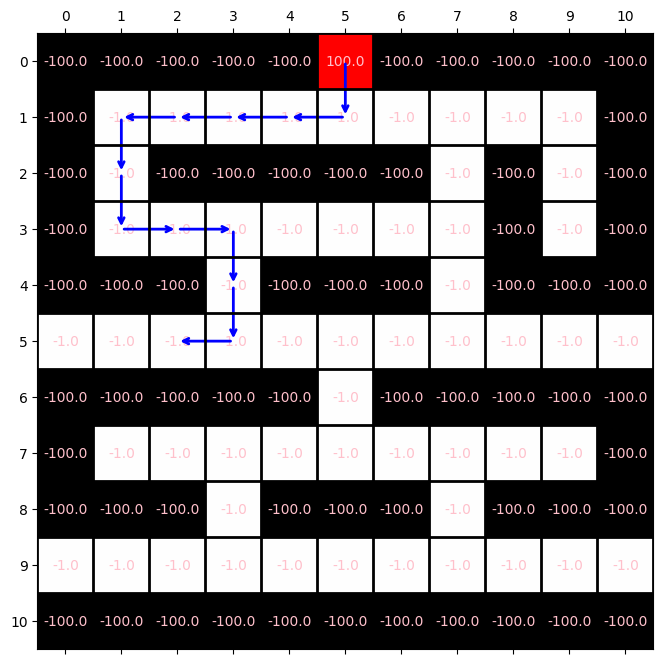

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the learning environment
num_rows, num_columns = 11, 11

# Initialize Q-values
q_matrix = np.zeros((num_rows, num_columns, 4))
directions = ['up', 'right', 'down', 'left']

# Define rewards
penalties = np.full((num_rows, num_columns), -100.)
penalties[0, 5] = 100.

# Define open areas
open_areas = {1: list(range(1, 10)), 2: [1, 7, 9], 3: list(range(1, 8)) + [9],
              4: [3, 7], 5: list(range(num_columns)), 6: [5], 7: list(range(1, 10)),
              8: [3, 7], 9: list(range(num_columns))}
for row in range(1, 10):
    for col in open_areas[row]:
        penalties[row, col] = -1.

def create_environment_csv(filename):
    """
    Creates a CSV file containing the environment parameters that can be used as neural network input.
    
    Args:
        filename (str): Name of the CSV file to be created
    """
    # Create a flattened version of the environment
    env_data = []
    
    for row in range(num_rows):
        for col in range(num_columns):
            # Create a dictionary for each cell
            cell_data = {
                'row': row,
                'col': col,
                'reward': penalties[row, col],
                'is_terminal': check_terminal_state(row, col),
                'is_wall': penalties[row, col] == -100,
                'is_path': penalties[row, col] == -1,
                'is_goal': penalties[row, col] == 100
            }
            
            # Add Q-values for each action
            for action_idx, action in enumerate(directions):
                cell_data[f'q_value_{action}'] = q_matrix[row, col, action_idx]
            
            env_data.append(cell_data)
    
    # Convert to DataFrame and save as CSV
    df = pd.DataFrame(env_data)
    df.to_csv(filename, index=False)
    print(f"Environment data saved to {filename}")

# Check if state is terminal
def check_terminal_state(row, col):
    return penalties[row, col] != -1.

# Get a random starting position
def random_start():
    start_row, start_col = np.random.randint(num_rows), np.random.randint(num_columns)
    # Ensure the starting location is not a terminal state
    while check_terminal_state(start_row, start_col):
        start_row, start_col = np.random.randint(num_rows), np.random.randint(num_columns)
    return start_row, start_col

# Select action using epsilon-greedy strategy
def select_action(row, col, epsilon_value):
    if np.random.random() < epsilon_value:
        return np.random.randint(4)
    return np.argmax(q_matrix[row, col])

# Calculate next position
def calculate_next_position(row, col, action):
    if directions[action] == 'up' and row > 0:
        row -= 1
    elif directions[action] == 'right' and col < num_columns - 1:
        col += 1
    elif directions[action] == 'down' and row < num_rows - 1:
        row += 1
    elif directions[action] == 'left' and col > 0:
        col -= 1
    return row, col

def find_shortest_path(start_row, start_col):
    if check_terminal_state(start_row, start_col):
        return []  # If the start is a terminal state, return an empty path

    path = [[start_row, start_col]]
    while not check_terminal_state(start_row, start_col):
        action = select_action(start_row, start_col, 0)
        start_row, start_col = calculate_next_position(start_row, start_col, action)
        path.append([start_row, start_col])
    return path

# Training parameters
exploration_rate = 0.1
gamma = 0.9
alpha = 0.9

episode_rewards = []  # Stores rewards for each episode
cumulative_rewards = []  # Stores cumulative rewards over time

for episode in range(1000):
    current_row, current_col = random_start()
    episode_reward = 0  # Reset episode reward at the start of each episode

    while not check_terminal_state(current_row, current_col):
        action = select_action(current_row, current_col, exploration_rate)
        old_row, old_col = current_row, current_col
        current_row, current_col = calculate_next_position(current_row, current_col, action)
        reward = penalties[current_row, current_col]

        episode_reward += reward  # Accumulate reward for this episode

        old_value = q_matrix[old_row, old_col, action]
        td_error = reward + gamma * np.max(q_matrix[current_row, current_col]) - old_value
        q_matrix[old_row, old_col, action] = old_value + alpha * td_error

    episode_rewards.append(episode_reward)  # Store reward for the episode
    cumulative_rewards.append(sum(episode_rewards))  # Compute cumulative reward

    # Print cumulative reward every 100 episodes
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}: Cumulative Reward = {cumulative_rewards[-1]}")
        print("Final Cumulative Rewards:", cumulative_rewards)

# Function to plot path on grid
def plot_path(grid_map, path):
    # Configuration for the plot
    color_map = plt.cm.jet
    norm = plt.Normalize(vmin=-100, vmax=100)
    colors = [[norm(-100), "black"], [norm(-1), "white"], [norm(100), "red"]]
    color_map = plt.cm.colors.LinearSegmentedColormap.from_list("", colors)

    fig, ax = plt.subplots(figsize=(8, 8))
    cax = ax.matshow(grid_map, cmap=color_map, interpolation='nearest')

    # Drawing grid lines
    for x in range(grid_map.shape[1] + 1):
        ax.axhline(x - 0.5, lw=2, color='k', zorder=5)
        ax.axvline(x - 0.5, lw=2, color='k', zorder=5)

    # Adding labels
    ax.set_xticks(np.arange(grid_map.shape[1]))
    ax.set_yticks(np.arange(grid_map.shape[0]))
    ax.set_xticklabels(np.arange(grid_map.shape[1]))
    ax.set_yticklabels(np.arange(grid_map.shape[0]))

    # Annotating rewards
    for i in range(grid_map.shape[0]):
        for j in range(grid_map.shape[1]):
            ax.text(j, i, str(grid_map[i, j]), va='center', ha='center', color='pink')

    # Plotting the path
    if path:
        for i in range(len(path) - 1):
            start = path[i]
            end = path[i + 1]
            ax.annotate('', xy=(end[1], end[0]), xytext=(start[1], start[0]),
                        arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle="->", linewidth=2))

    plt.show()

# Main execution
grid_layout = np.array(penalties)

# Create CSV file of environment parameters
create_environment_csv("environment_parameters.csv")

# Display path
initial_location = (9, 4)
optimal_path = find_shortest_path(*initial_location)
print("Optimal Path:", optimal_path)
plot_path(grid_layout, optimal_path)

# Reverse path
reverse_path = find_shortest_path(5, 2)
reverse_path.reverse()
print("Reverse Optimal Path:", reverse_path)
plot_path(grid_layout, reverse_path)

# DQN

/var/folders/4y/7tt457md25sdbvjnzkllx98m0000gn/T/ipykernel_2246/110227705.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return int(state['row']), int(state['col'])
/var/folders/4y/7tt457md25sdbvjnzkllx98m0000gn/T/ipykernel_2246/110227705.py:126: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  dones = torch.tensor([x[4] for x in batch], dtype=torch.bool)


Episode 100: Reward = 9.0, Avg Reward = -103.0, Cumulative = -10305.0, Epsilon = 0.819
Episode 200: Reward = 94.0, Avg Reward = 9.8, Cumulative = -9323.0, Epsilon = 0.670
Episode 300: Reward = 41.0, Avg Reward = 63.8, Cumulative = -2948.0, Epsilon = 0.548
Episode 400: Reward = 93.0, Avg Reward = 75.6, Cumulative = 4615.0, Epsilon = 0.449
Episode 500: Reward = 91.0, Avg Reward = 81.1, Cumulative = 12721.0, Epsilon = 0.368
Episode 600: Reward = 95.0, Avg Reward = 84.2, Cumulative = 21146.0, Epsilon = 0.301
Episode 700: Reward = 94.0, Avg Reward = 86.5, Cumulative = 29794.0, Epsilon = 0.246
Episode 800: Reward = 88.0, Avg Reward = 87.5, Cumulative = 38541.0, Epsilon = 0.202
Episode 900: Reward = 86.0, Avg Reward = 87.5, Cumulative = 47296.0, Epsilon = 0.165
Episode 1000: Reward = 98.0, Avg Reward = 88.2, Cumulative = 56116.0, Epsilon = 0.135


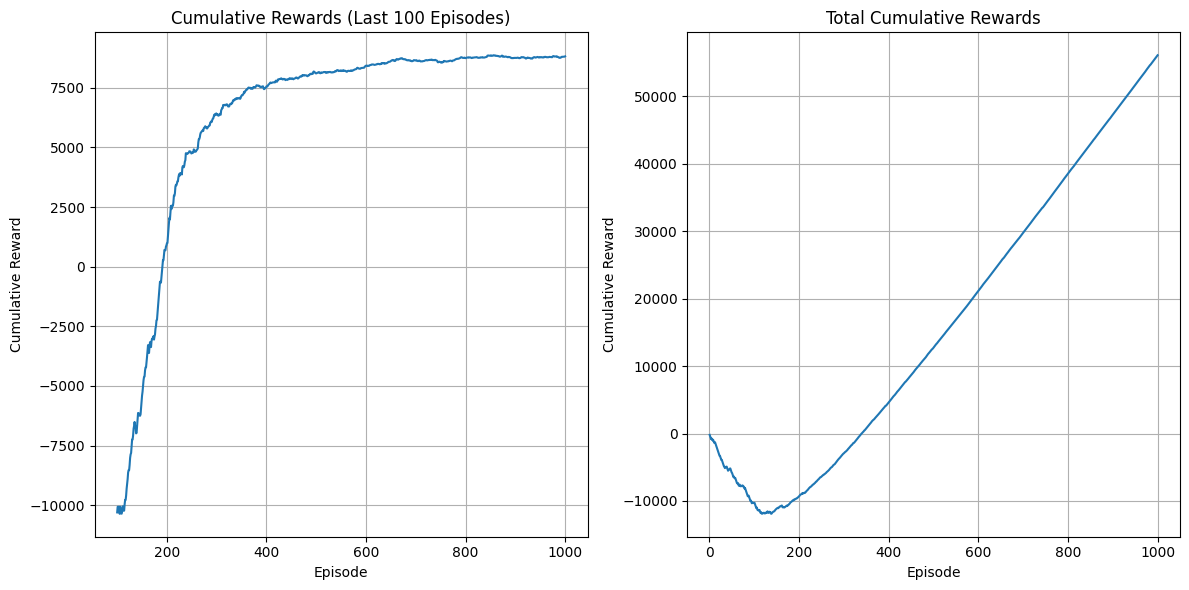

Optimal Path from (9,4): [[9, 4], [9, 3], [8, 3], [7, 3], [7, 4], [7, 5], [6, 5], [5, 5], [5, 6], [5, 7], [4, 7], [3, 7], [2, 7], [1, 7], [1, 6], [1, 5], [0, 5]]


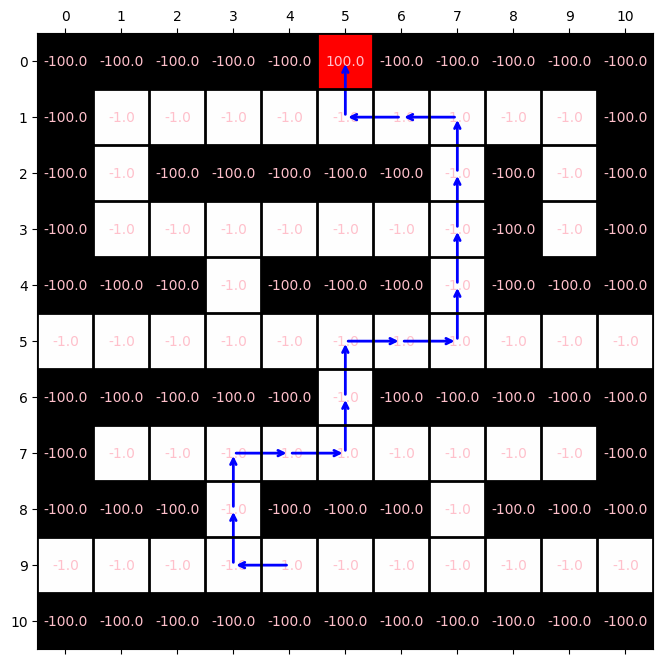

Reverse Optimal Path from (5,2): [[0, 5], [1, 5], [1, 6], [1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [5, 6], [5, 5], [5, 4], [5, 3], [5, 2]]


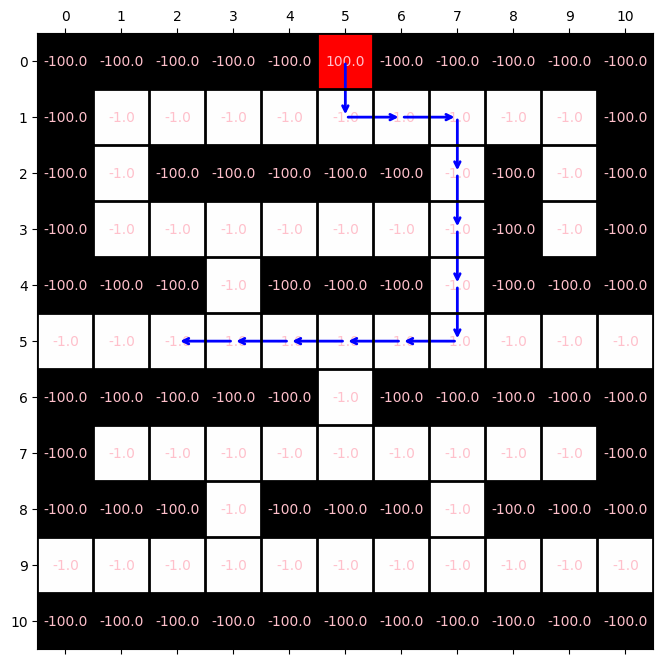

All data saved to CSV files:
- episode_rewards.csv: Contains per-episode rewards and cumulative rewards
- rolling_rewards.csv: Contains rolling window cumulative rewards
- optimal_path_9_4.csv: Contains path coordinates from start (9,4)
- reverse_path_5_2.csv: Contains path coordinates from start (5,2)


In [15]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import matplotlib.pyplot as plt

# Load environment from CSV
df = pd.read_csv("environment_parameters.csv")
GRID_ROWS, GRID_COLS = df['row'].max() + 1, df['col'].max() + 1

# Create grid layout from CSV data
def create_grid_layout():
    grid = np.full((GRID_ROWS, GRID_COLS), -100.)  # Default penalty
    for _, row in df.iterrows():
        if row['is_wall']:
            grid[row['row'], row['col']] = -100
        else:
            grid[row['row'], row['col']] = row['reward']
    return grid

grid_layout = create_grid_layout()

# Environment helpers
def is_terminal(row, col):
    return df[(df['row'] == row) & (df['col'] == col)]['is_terminal'].values[0]

def get_reward(row, col):
    return df[(df['row'] == row) & (df['col'] == col)]['reward'].values[0]

def is_valid_position(row, col):
    if 0 <= row < GRID_ROWS and 0 <= col < GRID_COLS:
        return not df[(df['row'] == row) & (df['col'] == col)]['is_wall'].values[0]
    return False

# Actions: up, right, down, left
action_to_delta = {
    0: (-1, 0), 1: (0, 1), 2: (1, 0), 3: (0, -1)
}

# Normalize state (returns 2D tensor with batch dimension)
def normalize_state(row, col):
    return torch.FloatTensor([[row / GRID_ROWS, col / GRID_COLS]])

# DQN network
class DQN(nn.Module):
    def __init__(self):
        super(DQN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 4)
        )
    
    def forward(self, x):
        return self.model(x)

# Step in the environment
def step(row, col, action):
    delta = action_to_delta[action]
    new_row, new_col = row + delta[0], col + delta[1]
    if not is_valid_position(new_row, new_col):
        new_row, new_col = row, col
    reward = get_reward(new_row, new_col)
    done = is_terminal(new_row, new_col)
    return new_row, new_col, reward, done

# Random start from non-terminal states
def get_random_start():
    non_terminal = df[df['is_terminal'] == False]
    state = non_terminal.sample()
    return int(state['row']), int(state['col'])

# Hyperparameters
learning_rate = 0.01
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.998
epsilon_min = 0.05
num_episodes = 1000
max_steps_per_episode = 200
batch_size = 128
replay_buffer = deque(maxlen=20000)

# Model, optimizer, loss
policy_net = DQN()
target_net = DQN()
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
loss_fn = nn.SmoothL1Loss()

# Training loop
all_rewards = []
cumulative_rewards = []
total_reward = 0

for episode in range(num_episodes):
    row, col = get_random_start()
    state = normalize_state(row, col)
    episode_reward = 0

    for step_count in range(max_steps_per_episode):
        if random.random() < epsilon:
            action = random.randint(0, 3)
        else:
            with torch.no_grad():
                q_values = policy_net(state)
                action = torch.argmax(q_values).item()

        next_row, next_col, reward, done = step(row, col, action)
        next_state = normalize_state(next_row, next_col)
        replay_buffer.append((state, action, reward, next_state, done))

        # Training
        if len(replay_buffer) >= batch_size:
            batch = random.sample(replay_buffer, batch_size)
            states = torch.cat([x[0] for x in batch])
            actions = torch.tensor([x[1] for x in batch])
            rewards = torch.tensor([x[2] for x in batch], dtype=torch.float32)
            next_states = torch.cat([x[3] for x in batch])
            dones = torch.tensor([x[4] for x in batch], dtype=torch.bool)

            current_q = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()
            next_q = target_net(next_states).max(1)[0].detach()
            target_q = rewards + gamma * next_q * (~dones)

            loss = loss_fn(current_q, target_q)
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(policy_net.parameters(), 1.0)
            optimizer.step()

        row, col = next_row, next_col
        state = next_state
        episode_reward += reward

        if done:
            break

    all_rewards.append(episode_reward)
    total_reward += episode_reward
    cumulative_rewards.append(total_reward)

    # Update epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Sync target net
    if episode % 5 == 0:
        target_net.load_state_dict(policy_net.state_dict())

    if (episode + 1) % 100 == 0:
        avg_reward = np.mean(all_rewards[-100:])
        print(f"Episode {episode + 1}: Reward = {episode_reward:.1f}, Avg Reward = {avg_reward:.1f}, Cumulative = {total_reward:.1f}, Epsilon = {epsilon:.3f}")

# Create DataFrames for reward metrics
window_size = 100
rolling_cumulative = [sum(all_rewards[i:i+window_size]) 
                     for i in range(len(all_rewards)-window_size+1)]

# Save all reward data to CSV files
episode_data = pd.DataFrame({
    'Episode': range(1, len(all_rewards) + 1),
    'Episode_Reward': all_rewards,
    'Cumulative_Reward': cumulative_rewards
})

rolling_data = pd.DataFrame({
    'Episode': range(window_size, len(all_rewards) + 1),
    'Rolling_Cumulative_Reward': rolling_cumulative
})

# Save to CSV
episode_data.to_csv('episode_rewards.csv', index=False)
rolling_data.to_csv('rolling_rewards.csv', index=False)

# Plot reward metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(rolling_data['Episode'], rolling_data['Rolling_Cumulative_Reward'])
plt.title(f"Cumulative Rewards (Last {window_size} Episodes)")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(episode_data['Episode'], episode_data['Cumulative_Reward'])
plt.title("Total Cumulative Rewards")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.tight_layout()
plt.show()

# Path visualization function
def plot_path(grid_map, path):
    color_map = plt.cm.jet
    norm = plt.Normalize(vmin=-100, vmax=100)
    colors = [[norm(-100), "black"], [norm(-1), "white"], [norm(100), "red"]]
    color_map = plt.cm.colors.LinearSegmentedColormap.from_list("", colors)

    fig, ax = plt.subplots(figsize=(8, 8))
    cax = ax.matshow(grid_map, cmap=color_map, interpolation='nearest')

    # Drawing grid lines
    for x in range(grid_map.shape[1] + 1):
        ax.axhline(x - 0.5, lw=2, color='k', zorder=5)
        ax.axvline(x - 0.5, lw=2, color='k', zorder=5)

    # Adding labels
    ax.set_xticks(np.arange(grid_map.shape[1]))
    ax.set_yticks(np.arange(grid_map.shape[0]))
    ax.set_xticklabels(np.arange(grid_map.shape[1]))
    ax.set_yticklabels(np.arange(grid_map.shape[0]))

    # Annotating rewards
    for i in range(grid_map.shape[0]):
        for j in range(grid_map.shape[1]):
            ax.text(j, i, str(grid_map[i, j]), va='center', ha='center', color='pink')

    # Plotting the path
    if path:
        for i in range(len(path) - 1):
            start = path[i]
            end = path[i + 1]
            ax.annotate('', xy=(end[1], end[0]), xytext=(start[1], start[0]),
                        arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle="->", linewidth=2))

    plt.show()

# Find and plot optimal paths
def find_optimal_path(start_row, start_col, policy_net):
    if is_terminal(start_row, start_col):
        return []
    
    path = [[start_row, start_col]]
    current_row, current_col = start_row, start_col
    
    for _ in range(100):  # Max path length
        if is_terminal(current_row, current_col):
            break
            
        with torch.no_grad():
            state = normalize_state(current_row, current_col)
            action = torch.argmax(policy_net(state)).item()
            
        current_row, current_col = step(current_row, current_col, action)[:2]
        path.append([current_row, current_col])
        
    return path

# Save path data to CSV
def save_path_to_csv(path, filename):
    path_df = pd.DataFrame(path, columns=['row', 'col'])
    path_df.to_csv(filename, index=False)

# Visualize paths and save to CSV
initial_location = (9, 4)
optimal_path = find_optimal_path(*initial_location, policy_net)
print("Optimal Path from (9,4):", optimal_path)
save_path_to_csv(optimal_path, 'optimal_path_9_4.csv')
plot_path(grid_layout, optimal_path)

reverse_location = (5, 2)
reverse_path = find_optimal_path(*reverse_location, policy_net)
reverse_path.reverse()
print("Reverse Optimal Path from (5,2):", reverse_path)
save_path_to_csv(reverse_path, 'reverse_path_5_2.csv')
plot_path(grid_layout, reverse_path)

# Save the trained model
torch.save(policy_net.state_dict(), "dqn_model.pth")

print("All data saved to CSV files:")
print("- episode_rewards.csv: Contains per-episode rewards and cumulative rewards")
print("- rolling_rewards.csv: Contains rolling window cumulative rewards")
print("- optimal_path_9_4.csv: Contains path coordinates from start (9,4)")
print("- reverse_path_5_2.csv: Contains path coordinates from start (5,2)")

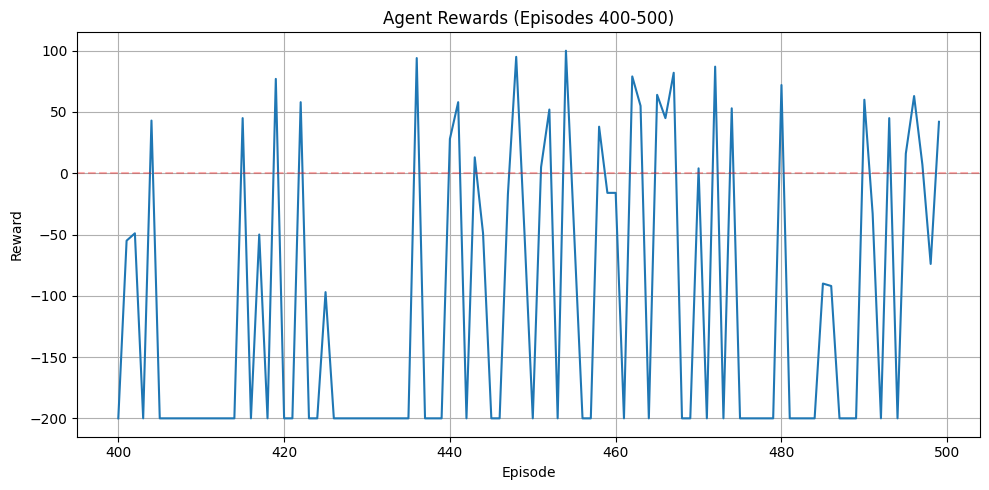

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Plot rewards for episodes 400-500
plt.figure(figsize=(10, 5))
plt.plot(range(400, 500), all_rewards[0:100])
plt.title("Agent Rewards (Episodes 400-500)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)

# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Comparison

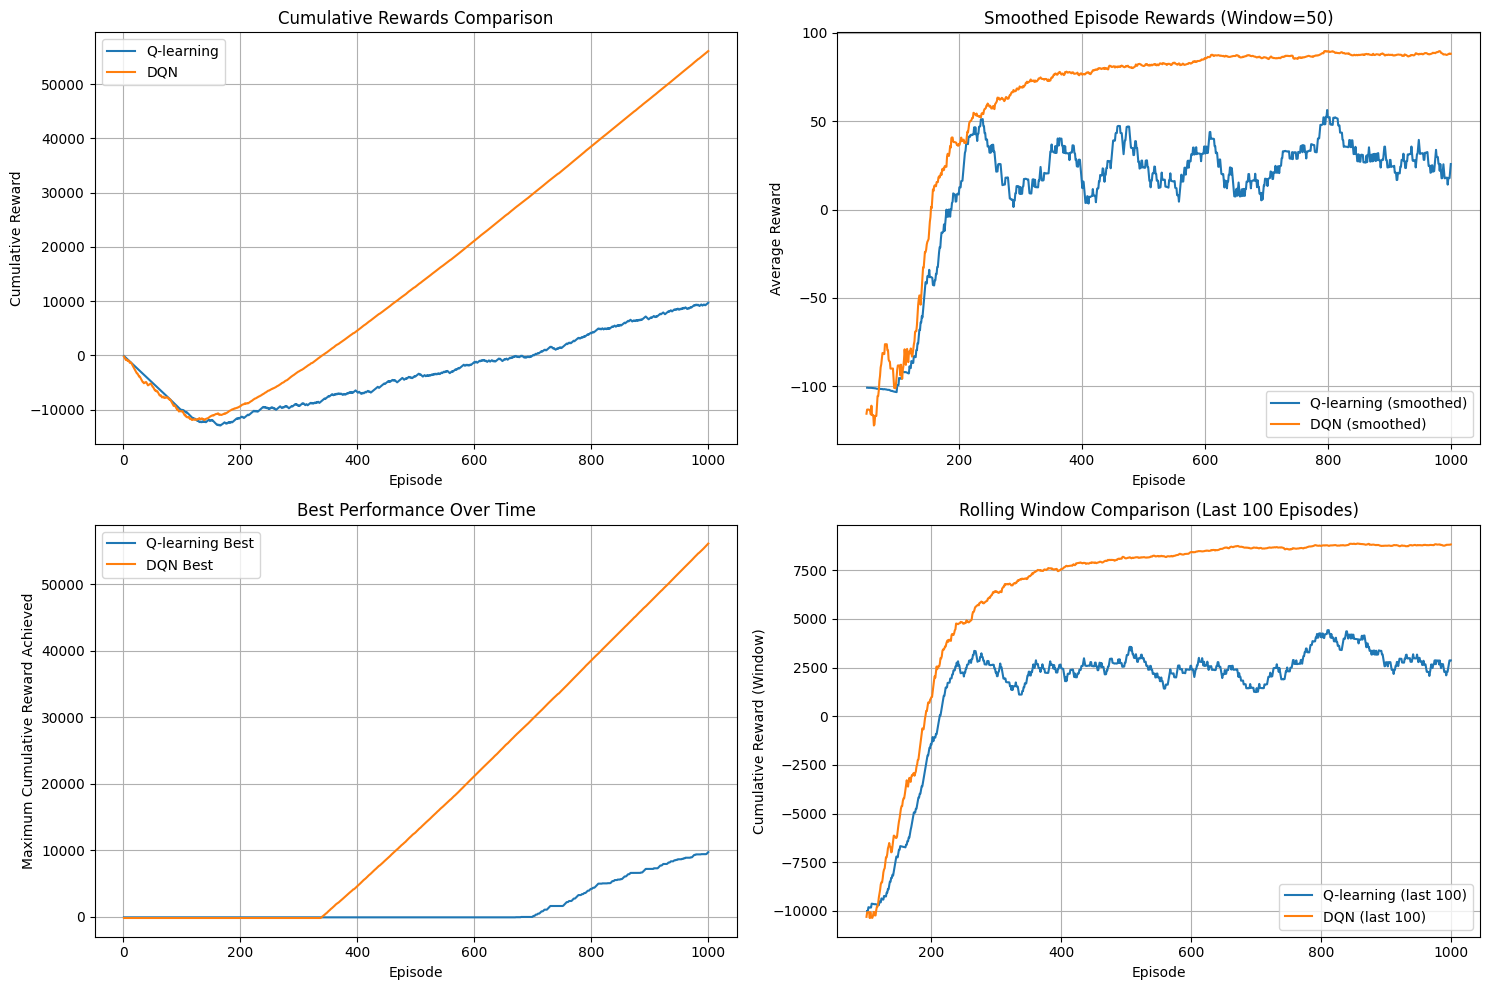

Path data files not found. Skipping path comparison.


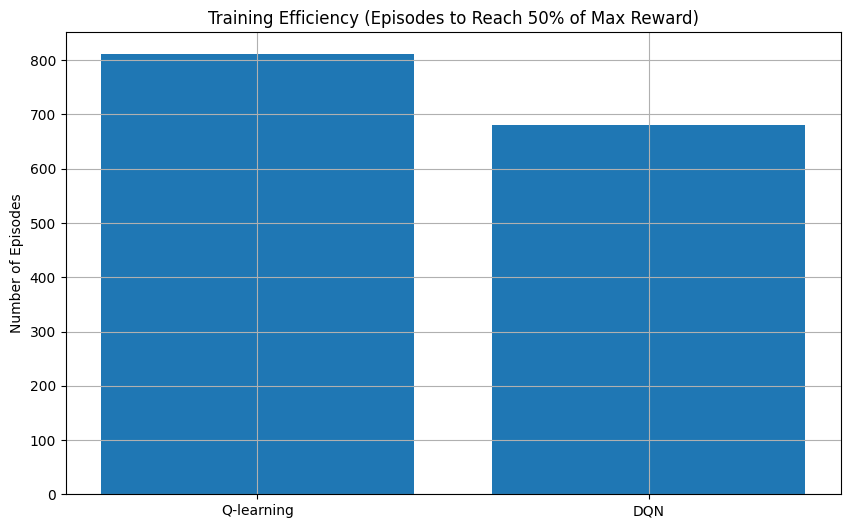


=== Summary Statistics ===
Q-learning Final Cumulative Reward: 9713.00
DQN Final Cumulative Reward: 56116.00

Q-learning Episodes to 50%: 811
DQN Episodes to 50%: 680


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Q-learning data
q_learning_data = pd.read_csv('q_learning_rewards.csv')

# Load DQN data
dqn_episode_data = pd.read_csv('episode_rewards.csv')
dqn_rolling_data = pd.read_csv('rolling_rewards.csv')

# Create comparison plots
plt.figure(figsize=(15, 10))

# 1. Cumulative Rewards Comparison
plt.subplot(2, 2, 1)
plt.plot(q_learning_data['Episode'], q_learning_data['Cumulative_Reward'], label='Q-learning')
plt.plot(dqn_episode_data['Episode'], dqn_episode_data['Cumulative_Reward'], label='DQN')
plt.title('Cumulative Rewards Comparison')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.grid(True)

# 2. Episode Rewards Comparison (smoothed with moving average)
window_size = 50
plt.subplot(2, 2, 2)
plt.plot(q_learning_data['Episode'], 
         q_learning_data['Cumulative_Reward'].diff().rolling(window_size).mean(), 
         label='Q-learning (smoothed)')
plt.plot(dqn_episode_data['Episode'], 
         dqn_episode_data['Episode_Reward'].rolling(window_size).mean(), 
         label='DQN (smoothed)')
plt.title(f'Smoothed Episode Rewards (Window={window_size})')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(True)

# 3. Performance Over Time Comparison
plt.subplot(2, 2, 3)
plt.plot(q_learning_data['Episode'], 
         q_learning_data['Cumulative_Reward'].cummax(), 
         label='Q-learning Best')
plt.plot(dqn_episode_data['Episode'], 
         dqn_episode_data['Cumulative_Reward'].cummax(), 
         label='DQN Best')
plt.title('Best Performance Over Time')
plt.xlabel('Episode')
plt.ylabel('Maximum Cumulative Reward Achieved')
plt.legend()
plt.grid(True)

# 4. Rolling Window Comparison (last 100 episodes)
plt.subplot(2, 2, 4)
# For Q-learning, we need to calculate rolling window as it wasn't saved
q_rolling = q_learning_data['Cumulative_Reward'].diff().rolling(100).sum()
plt.plot(q_learning_data['Episode'][99:], q_rolling[99:], label='Q-learning (last 100)')
plt.plot(dqn_rolling_data['Episode'], dqn_rolling_data['Rolling_Cumulative_Reward'], label='DQN (last 100)')
plt.title('Rolling Window Comparison (Last 100 Episodes)')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward (Window)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Path efficiency comparison (if path files exist)
try:
    # Load paths
    ql_path = pd.read_csv('optimal_path.csv')  # Assuming you saved Q-learning path
    dqn_path = pd.read_csv('optimal_path_9_4.csv')
    
    # Calculate path lengths
    ql_length = len(ql_path)
    dqn_length = len(dqn_path)
    
    # Calculate path rewards (assuming same reward structure)
    ql_reward = sum(get_reward(row, col) for row, col in zip(ql_path['row'], ql_path['col']))
    dqn_reward = sum(get_reward(row, col) for row, col in zip(dqn_path['row'], dqn_path['col']))
    
    # Create comparison bar plots
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.bar(['Q-learning', 'DQN'], [ql_length, dqn_length])
    plt.title('Path Length Comparison')
    plt.ylabel('Number of Steps')
    
    plt.subplot(1, 2, 2)
    plt.bar(['Q-learning', 'DQN'], [ql_reward, dqn_reward])
    plt.title('Path Total Reward Comparison')
    plt.ylabel('Total Reward')
    
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Path data files not found. Skipping path comparison.")

# Training Efficiency Comparison
plt.figure(figsize=(10, 6))

# Calculate when each method reached 50% of max reward
ql_max = q_learning_data['Cumulative_Reward'].max()
dqn_max = dqn_episode_data['Cumulative_Reward'].max()

ql_halfway = q_learning_data[q_learning_data['Cumulative_Reward'] >= ql_max * 0.5]['Episode'].min()
dqn_halfway = dqn_episode_data[dqn_episode_data['Cumulative_Reward'] >= dqn_max * 0.5]['Episode'].min()

plt.bar(['Q-learning', 'DQN'], [ql_halfway, dqn_halfway])
plt.title('Training Efficiency (Episodes to Reach 50% of Max Reward)')
plt.ylabel('Number of Episodes')
plt.grid(True)
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===")
print(f"Q-learning Final Cumulative Reward: {ql_max:.2f}")
print(f"DQN Final Cumulative Reward: {dqn_max:.2f}")
print(f"\nQ-learning Episodes to 50%: {ql_halfway}")
print(f"DQN Episodes to 50%: {dqn_halfway}")

try:
    print(f"\nQ-learning Path Length: {ql_length} steps")
    print(f"DQN Path Length: {dqn_length} steps")
    print(f"\nQ-learning Path Reward: {ql_reward:.2f}")
    print(f"DQN Path Reward: {dqn_reward:.2f}")
except NameError:
    pass

# Requirements.txt


numpy>=1.21.0
matplotlib>=3.4.0
tensorflow>=2.8.0
tqdm>=4.60.0
seaborn>=0.11.0       # For better visualizations
gym>=0.26.0 